# DB Scan Clustering Algorithm (Basic)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Sample Data with original cluster plot

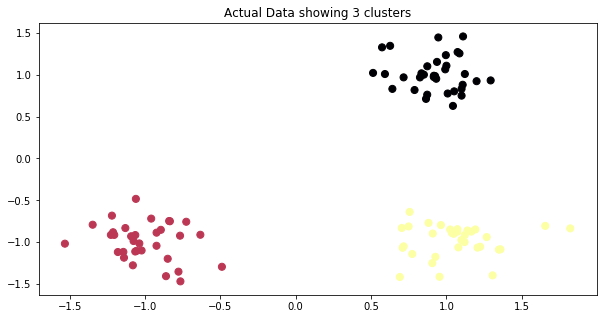

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

## DBScan Class

In [4]:
class DBScan:
    def __init__(self,X,eps,min_pts):
        self.X = X
        self.eps = eps
        self.min_pts = min_pts
        self.cluster = np.zeros(X.shape[0])
    def neighbors(self,p):
        ngh_points = []
        for i in range(X.shape[0]):
            if(i!=p):
                d=np.linalg.norm(X[p]-X[i])
                if(d<=self.eps):
                    ngh_points.append(i)
        return ngh_points
    def fit(self):
        c = 0
        for i in range(X.shape[0]):
            if(self.cluster[i]==0):
                ngh_points = self.neighbors(i)
                if(len(ngh_points)>self.min_pts):
                    c += 1
                    self.cluster[i] = c
                    for j in ngh_points:
                        self.cluster[j] = c

## Apply to our data

In [5]:
model = DBScan(X,1,5)
model.fit()

## Result of DBScan Clustering Algorithm

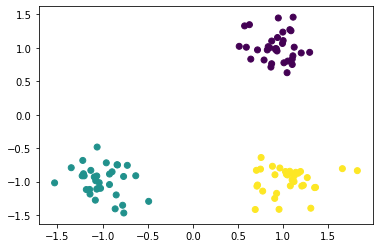

In [6]:
plt.scatter(X[:,0],X[:,1],c=model.cluster)